## Import libraries

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.layers import LSTM

## Load and Perform simple EDA for Singtel Stock

In [2]:
#import the stock dataset of Singtel. It is listed on the Singapore stock exchange
singtel_df = pd.read_csv("/content/singtel.csv", index_col='Date', parse_dates=['Date'])

#Copy dataframe to a new variable to avoid any accidental changes in the original data
singtel_df_new = singtel_df.copy()

#Display the dataframe
display(singtel_df_new)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.68,3.69,3.65,3.66,2.496178,7280000
2014-01-03,3.65,3.66,3.59,3.60,2.455256,13827000
2014-01-06,3.59,3.59,3.52,3.54,2.414336,20800000
2014-01-07,3.54,3.57,3.53,3.54,2.414336,22746000
2014-01-08,3.56,3.57,3.54,3.55,2.421156,14599000
...,...,...,...,...,...,...
2022-12-23,2.58,2.59,2.56,2.57,2.545663,8518500
2022-12-27,2.59,2.60,2.58,2.58,2.555568,6353800
2022-12-28,2.58,2.59,2.56,2.58,2.555568,9060100


In [3]:
#Display the number of rows and columns in the dataframe
singtel_df_new.shape

(2262, 6)

In [4]:
#Display the columns in the dataset
singtel_df_new.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
#Display information about the dataframe
singtel_df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2262 entries, 2014-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2262 non-null   float64
 1   High       2262 non-null   float64
 2   Low        2262 non-null   float64
 3   Close      2262 non-null   float64
 4   Adj Close  2262 non-null   float64
 5   Volume     2262 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.7 KB


In [6]:
#Displays output of describe function and converting values that are displayed from scientific notation to normal numeric values
singtel_df_new.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Open,High,Low,Close,Adj Close,Volume
count,2262.00000,2262.00000,2262.00000,2262.00000,2262.00000,2262.00000
mean,3.28016,3.30314,3.25557,3.27934,2.66202,23684934.52122
std,0.62497,0.62638,0.62166,0.62515,0.28855,12901305.28807
min,2.01000,2.04000,2.00000,2.00000,1.83329,0.00000
25%,2.63000,2.65000,2.61000,2.63000,2.45753,15225225.00000
50%,3.37000,3.39000,3.34000,3.37000,2.67443,20907650.00000
75%,3.81000,3.84000,3.78750,3.81000,2.90752,28651350.00000
max,4.57000,4.57000,4.47000,4.53000,3.28963,119401400.00000


In [7]:
#Check if any variable contains missing values
#It will return TRUE beside the column that contains missing values
singtel_df_new.isnull().any(axis=0)

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
#Check if there are any duplicated rows
singtel_df_new.duplicated().sum()

0

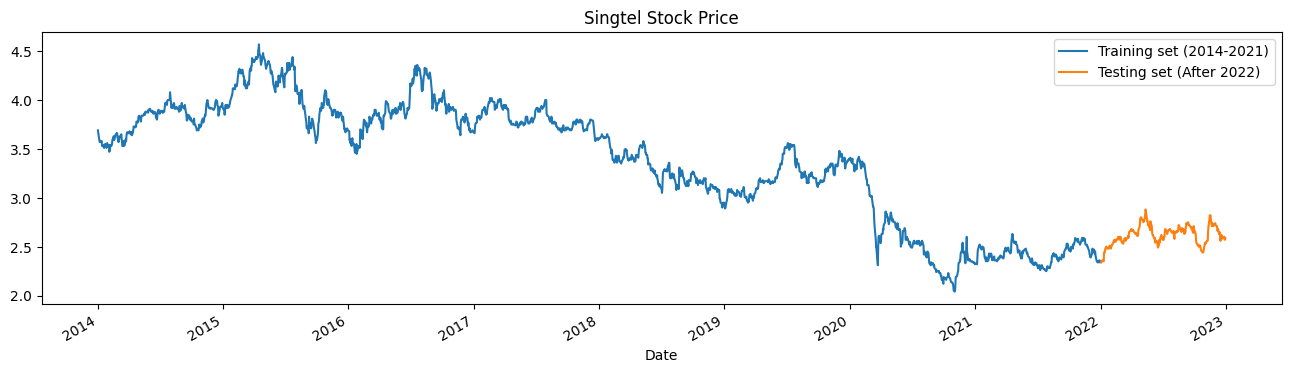

In [9]:
#plot a graph to show the stock prices in the 2 data durations

#graph for 2014-2021
singtel_df_new["High"][:'2021'].plot(figsize=(16,4),legend=True)

#graph for 2022
singtel_df_new["High"]['2022':].plot(figsize=(16,4),legend=True)


plt.legend(['Training set (2014-2021)', 'Testing set (After 2022)'])
plt.title('Singtel Stock Price')
plt.show()

## Split the data into training and testing dataset

In [10]:
#Splitting the data into train and test

#training data
start_date = "2014-01-02"
end_date = "2021-12-31"
training_data = singtel_df_new.loc[start_date:end_date, ["High", "Volume"]].apply(lambda s: s.apply('{0:.5f}'.format)).values

In [11]:
display(training_data)

array([['3.69000', '7280000.00000'],
       ['3.66000', '13827000.00000'],
       ['3.59000', '20800000.00000'],
       ...,
       ['2.36000', '10435200.00000'],
       ['2.34000', '16582500.00000'],
       ['2.34000', '9453400.00000']], dtype=object)

In [12]:
len(training_data)

2012

In [13]:
training_data.shape

(2012, 2)

In [14]:
#testing data
start_date = "2022-01-03"
end_date = "2022-12-30"
testing_data = singtel_df_new.loc[start_date:end_date, ["High", "Volume"]].apply(lambda s: s.apply('{0:.5f}'.format)).values

In [15]:
display(testing_data)

array([['2.34000', '11174600.00000'],
       ['2.35000', '26369200.00000'],
       ['2.35000', '29463627.00000'],
       ['2.36000', '26807300.00000'],
       ['2.36000', '27193000.00000'],
       ['2.35000', '29131681.00000'],
       ['2.44000', '82803100.00000'],
       ['2.44000', '31945000.00000'],
       ['2.44000', '29537200.00000'],
       ['2.47000', '41609500.00000'],
       ['2.50000', '41988300.00000'],
       ['2.50000', '23290700.00000'],
       ['2.48000', '14905400.00000'],
       ['2.48000', '19969000.00000'],
       ['2.48000', '16173500.00000'],
       ['2.49000', '32303000.00000'],
       ['2.48000', '43374000.00000'],
       ['2.50000', '30668100.00000'],
       ['2.50000', '34605400.00000'],
       ['2.51000', '55059400.00000'],
       ['2.48000', '23184000.00000'],
       ['2.52000', '63503300.00000'],
       ['2.52000', '25154500.00000'],
       ['2.54000', '25726200.00000'],
       ['2.56000', '30426000.00000'],
       ['2.56000', '20467400.00000'],
       ['2.5

In [16]:
len(testing_data)

250

In [17]:
testing_data.shape

(250, 2)

In [18]:
#Scaling the training data
sc = MinMaxScaler(feature_range=(0,1))
scaled_training_data = sc.fit_transform(training_data)

In [19]:
scaled_training_data.shape

(2012, 2)

In [20]:
#Split the training data into x and y train
X_train = []
Y_train = []

for i in range(52,2012):
  X_train.append(scaled_training_data[i-52:i,0])
  Y_train.append(scaled_training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [21]:
X_train.shape

(1960, 52)

In [22]:
Y_train.shape

(1960,)

In [23]:
#Reshape X_train
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1960, 52, 1)

## Create the LSTM Model

In [24]:
#Initialize constructor
model = Sequential()

#LSTM layer
model.add(LSTM(100, input_shape = (52,1)))

#Output layer
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
# W 1 x 100 , b 1 x 1
1*100+1

101

In [26]:
# [ h_{t-1}, x] -- 128+1(x), h,c are of dimension 128 x 1
(100*(100+1) +100)*4 #4 gates that we have in LSTM

40800

In [27]:
#fit the model to the training set
history = model.fit(X_train,Y_train,epochs=50,batch_size=32,validation_split=0.2)


Epoch 1/50
49/49 [==============================] - 4s 43ms/step - loss: 0.0275 - accuracy: 6.3776e-04 - val_loss: 0.0090 - val_accuracy: 0.0026
Epoch 2/50
49/49 [==============================] - 2s 31ms/step - loss: 0.0014 - accuracy: 6.3776e-04 - val_loss: 0.0042 - val_accuracy: 0.0026
Epoch 3/50
49/49 [==============================] - 1s 30ms/step - loss: 9.4924e-04 - accuracy: 6.3776e-04 - val_loss: 0.0017 - val_accuracy: 0.0026
Epoch 4/50
49/49 [==============================] - 2s 31ms/step - loss: 8.2292e-04 - accuracy: 6.3776e-04 - val_loss: 0.0011 - val_accuracy: 0.0026
Epoch 5/50
49/49 [==============================] - 2s 48ms/step - loss: 8.0015e-04 - accuracy: 6.3776e-04 - val_loss: 0.0011 - val_accuracy: 0.0026
Epoch 6/50
49/49 [==============================] - 2s 33ms/step - loss: 7.8147e-04 - accuracy: 6.3776e-04 - val_loss: 9.3500e-04 - val_accuracy: 0.0026
Epoch 7/50
49/49 [==============================] - 2s 31ms/step - loss: 7.4864e-04 - accuracy: 6.3776e-04 - v

In [28]:
#prepare the testing data

#Scaling the training data
sc = MinMaxScaler(feature_range=(0,1))
scaled_testing_data = sc.fit_transform(testing_data)

In [29]:
scaled_testing_data.shape

(250, 2)

In [30]:
#Split the testing data into x and y train
X_test = []
Y_test = []

for i in range(52,250):
  X_test.append(scaled_testing_data[i-52:i,0])
  Y_test.append(scaled_testing_data[i,0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [31]:
X_test.shape

(198, 52)

In [32]:
Y_test.shape

(198,)

In [33]:
#Reshape X_test
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(198, 52, 1)

In [34]:
#Reshape Y_test
Y_test = np.reshape(Y_test,(-1,1))
Y_test.shape

(198, 1)

In [35]:
#predictions with X_test data
predicted_stock_price = model.predict(X_test)
predicted_stock_price.shape

7/7 [==============================] - 0s 11ms/step


(198, 1)

## Rate performance

In [36]:
#Evaluating Model Performance
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, predicted_stock_price))
print(rmse)

0.07183844270237526


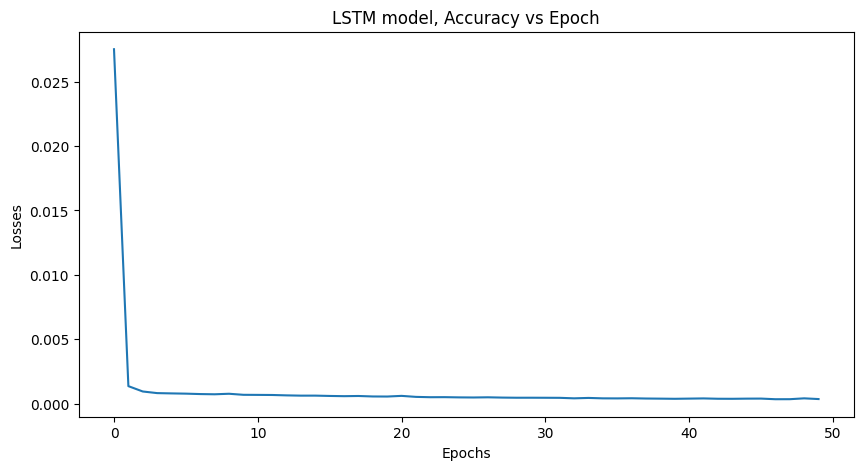

In [37]:
#LSTM Model
plt.figure(figsize =(10,5))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()


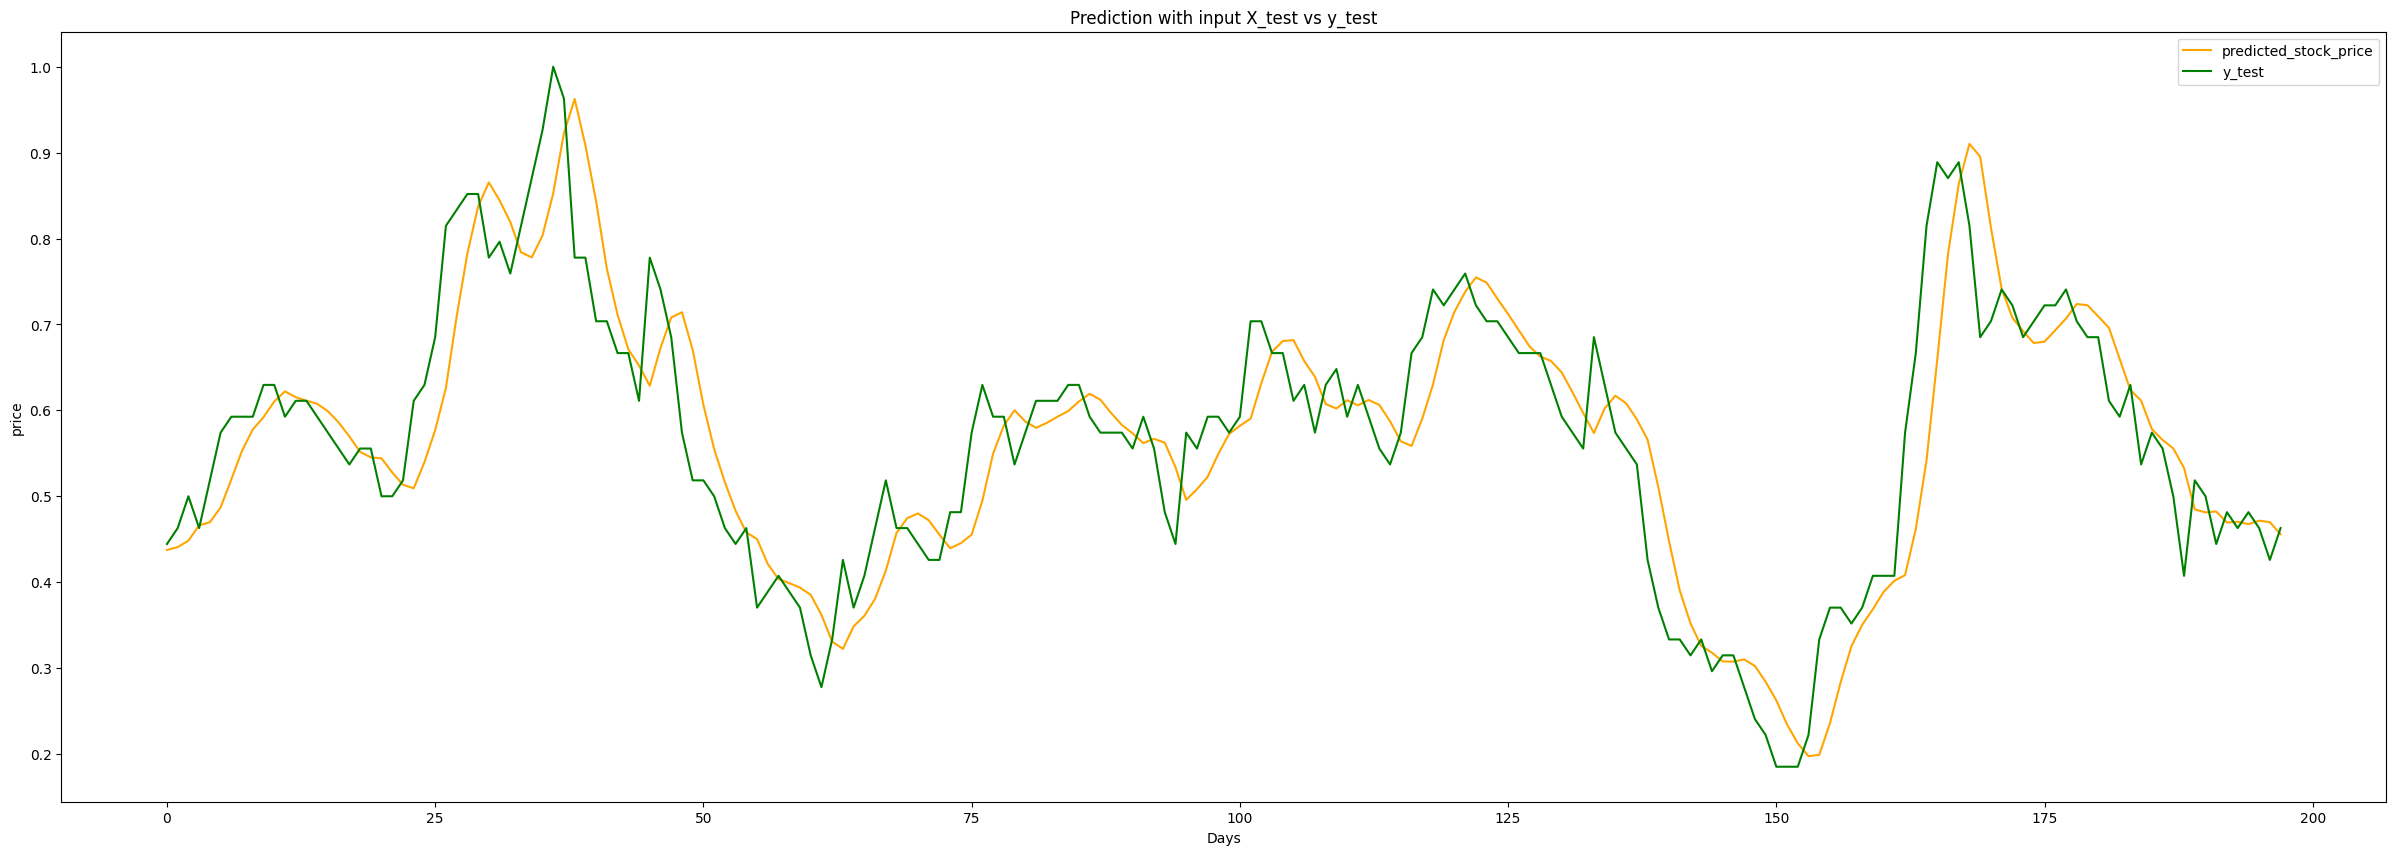

In [38]:
#Visualize the results of LSTM

plt.figure(figsize = (30,10))
plt.plot(predicted_stock_price, label = "predicted_stock_price", c = "orange")
plt.plot(Y_test, label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("price")
plt.title("Prediction with input X_test vs y_test")
plt.legend()
plt.show()

Root Mean Squared Error (RMSE) measures the average difference between the values predicted and the actual model. It provides information of how well the model is able to predict the actual values.

A RMSE squar of 0 tells that the model has perfectly predicted the actual values. My RMSE score is 0.07 which means that it is closer to zero and that the model is pretty accurate in predicting the price.

The graph above shows that the actual predicted price depicted by Y_test and the predicted stock price given by the model is almost the same which states that the model has a good accuracy rating.